In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

In [ ]:
import re
import nltk
nltk.download("stopwords")
from nltk.util import pr
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset/twitter_data.csv")
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


In [ ]:
df['labels'] = (df['class']).apply(lambda x: 1 if x < 2 else 0)
#df["labels"] = df["class"].map({1 : "Hate Speech Detected",0:"No Hate and No Offense Detected"})
#df["labels"] = df["labels"].fillna("No Hate and No Offense Detected")
df["labels"] = df["labels"].fillna(0)
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  labels  
0  !!! RT @mayasolovely: As a woman you shouldn't...       0  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...       1  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...       1  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...       1  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...       1  


In [ ]:
sample = pd.DataFrame(df['labels']).value_counts()
sample

labels
1         20620
0          4163
dtype: int64

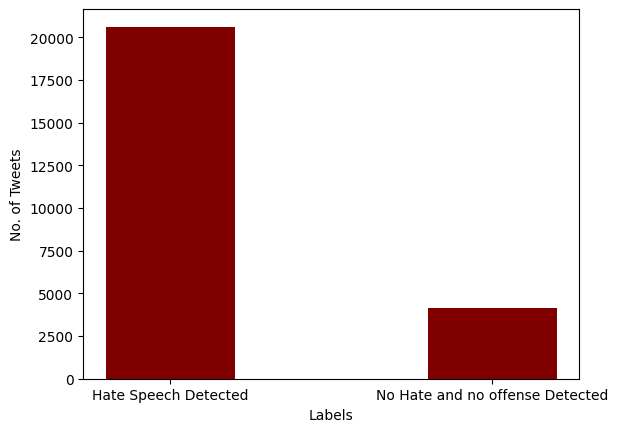

In [ ]:
plt.bar(["Hate Speech Detected","No Hate and no offense Detected"], sample, color ='maroon',width = 0.4)
plt.xlabel("Labels")
plt.ylabel("No. of Tweets")
plt.show()

In [ ]:
df = df[['tweet','labels']]
print(df.head())
print(df.sample(50))

                                               tweet  labels
0  !!! RT @mayasolovely: As a woman you shouldn't...       0
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...       1
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...       1
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...       1
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...       1
                                                   tweet  labels
3458   @ILIKECATS74 @yoPapi_chulo @sizzurp__ @brandon...       1
8452                                   Cheer up Charlie.       0
2698   @BryanStars ATL, BVB, SWS, PTV, THE RELAPSE SY...       0
5837   @densonkeith most of these people are follower...       1
11536  If anyone wants to bring me a sweet tea to my ...       0
17425  RT @StevStiffler: Can't trust a bitch who lets...       1
1107   &#8220;@AnthonyCumia: RT @ispfemme: Another Je...       1
9821             High thenna bitch that's y I'm tweeting       1
16969  RT @QueenHoneyC: All you hoes is still gon

In [ ]:
def clean(text):
  text = str(text).lower()
  text = re.sub('\[.*?\]','',text)
  text = re.sub('https?://\S+|www\.\S+','',text)
  text = re.sub('<.*?>+','',text)
  text = re.sub('[%s]'% re.escape(string.punctuation),'',text)
  text = re.sub('\n','',text)
  text = re.sub('\w*\d\w*','',text)
  text = [word for word in text.split(' ') if word not in stopword]
  text = " ".join(text)
  #text = [stemmer.stem(word) for word in text.split(' ')]
  #text = " ".join(text)
  return text
df['tweet'] = df['tweet'].apply(clean)
print(df.head())

                                               tweet  labels
0   rt mayasolovely woman shouldnt complain clean...       0
1   rt  boy dats coldtyga dwn bad cuffin dat hoe ...       1
2   rt urkindofbrand dawg rt  ever fuck bitch sta...       1
3           rt cganderson vivabased look like tranny       1
4   rt shenikaroberts shit hear might true might ...       1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup
import string

import warnings
warnings.filterwarnings('ignore')
from textblob import TextBlob
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

from nltk.stem.porter import PorterStemmer

In [ ]:
def preprocess(q):
  q = str(q).lower().strip()

   # Replace certain special characters with their string equivalents
  q = q.replace('%', ' percent')
  q = q.replace('$', ' dollar ')
  q = q.replace('₹', ' rupee ')
  q = q.replace('€', ' euro ')
  q = q.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
  q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
  q = q.replace(',000,000,000 ', 'b ')
  q = q.replace(',000,000 ', 'm ')
  q = q.replace(',000 ', 'k ')
  q = re.sub(r'([0-9]+)000000000', r'\1b', q)
  q = re.sub(r'([0-9]+)000000', r'\1m', q)
  q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
  contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
     "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
     "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }
  q_decontracted = []

  for word in q.split():
      if word in contractions:
          word = contractions[word]

      q_decontracted.append(word)

  q = ' '.join(q_decontracted)
  q = q.replace("'ve", " have")
  q = q.replace("n't", " not")
  q = q.replace("'re", " are")
  q = q.replace("'ll", " will")

    # Removing HTML tags
  q = BeautifulSoup(q)
  q = q.get_text()

  #ps = PorterStemmer()
  #q = ' '.join([ps.stem(word) for word in q.split()])


  return q

In [ ]:
df['tweet'] = df['tweet'].apply(preprocess)

In [ ]:
#df['tweet_len'] = df['tweet'].str.len()
#df['tweet_num_words'] = df['tweet'].apply(lambda row: len(row.split(" ")))

In [ ]:
x = np.array(df['tweet'])
y = np.array(df['labels'])
def vectorize(x):
  cv = CountVectorizer()
  x = cv.fit_transform(x)
  return x
x = vectorize(x)
#cv = CountVectorizer()
#x = cv.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
import gensim
from gensim.models import Word2Vec,KeyedVectors
from nltk import sent_tokenize,word_tokenize
import nltk
from gensim.utils import simple_preprocess

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
model = Word2Vec(window = 10)
tweet = list(df['tweet'])

In [ ]:
tweets=[]
for l in tweet:
  x = (sent_tokenize(l))
  for m in x:
    tweets.append(word_tokenize(m))
print(tweets)

[['rt', 'mayasolovely', 'woman', 'shouldnt', 'complain', 'cleaning', 'house', 'amp', 'man', 'always', 'take', 'trash'], ['rt', 'boy', 'dats', 'coldtyga', 'dwn', 'bad', 'cuffin', 'dat', 'hoe', 'place'], ['rt', 'urkindofbrand', 'dawg', 'rt', 'ever', 'fuck', 'bitch', 'start', 'cry', 'confused', 'shit'], ['rt', 'cganderson', 'vivabased', 'look', 'like', 'tranny'], ['rt', 'shenikaroberts', 'shit', 'hear', 'might', 'true', 'might', 'faker', 'bitch', 'told', 'ya'], ['tmadisonx', 'shit', 'blows', 'meclaim', 'faithful', 'somebody', 'still', 'fucking', 'hoes'], ['brighterdays', 'sit', 'hate', 'another', 'bitch', 'got', 'much', 'shit', 'going'], ['cause', 'im', 'tired', 'big', 'bitches', 'coming', 'us', 'skinny'], ['amp', 'might', 'get', 'ya', 'bitch', 'back', 'amp', 'thats'], ['rhythmixx', 'hobbies', 'include', 'fighting', 'mariambitch'], ['keeks', 'bitch', 'curves', 'everyone', 'lol', 'walked', 'conversation', 'like', 'smh'], ['murda', 'gang', 'bitch', 'gang', 'land'], ['hoes', 'smoke', 'losers

In [ ]:
model.build_vocab(tweets)
vector = model.train(tweets,total_examples=model.corpus_count,epochs=model.epochs)
vector

(699343, 1042525)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN

In [ ]:
model = Sequential()
model.add(SimpleRNN(30))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
x = np.array(df['tweet'])
y = np.array(df['labels'])
#tfidf = TfidfVectorizer(max_features=3000)
#x = tfidf.fit_transform(x).toarray()
#x = pd.DataFrame(x, index=df.index)
#new_df = df[['tweet_len','tweet_num_words']]
#x = pd.concat([new_df,x],axis=1)
#x.columns = x.columns.astype(str)
#x.head(10)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
print(x.shape[0])

24783


In [ ]:
test_data = "shut up bitch"
df = tfidf.transform([test_data]).toarray()
print(clf.predict(df))

[1]


In [ ]:
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))
print("Accuracy Score of the model is {}".format(accuracy_score(y_test,y_pred)))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79      1041
           1       0.96      0.96      0.96      5155

    accuracy                           0.93      6196
   macro avg       0.87      0.87      0.87      6196
weighted avg       0.93      0.93      0.93      6196

Accuracy Score of the model is 0.9285022595222724


[[ 825  216]
 [ 227 4928]]


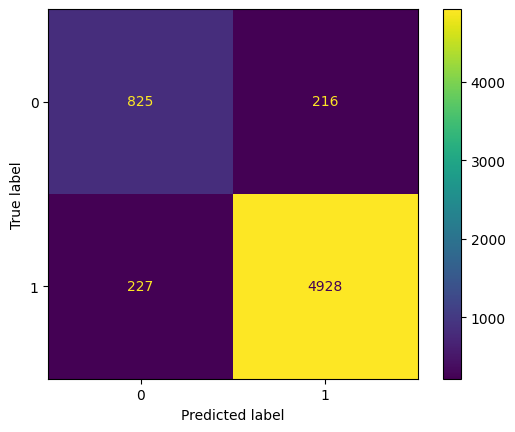

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
ConfusionMatrixDisplay(matrix).plot()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics

kValues = range(1,11,2)
y_prediction = []
y_accuracy = []
for n_neighbor in kValues:
  knn = KNeighborsClassifier(n_neighbors=n_neighbor)
  knn.fit(x_train,y_train)
  KNeighborsClassifier(knn)
  y_pred = knn.predict(x_test)
  y_prediction.append(y_pred)
  y_accuracy.append(metrics.accuracy_score(y_test,y_pred))
print(y_accuracy)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
KNeighborsClassifier(knn)
y_pred1 = knn.predict(x_test)
y_prediction.append(y_pred1)
y_accuracy.append(metrics.accuracy_score(y_test,y_pred1))
print("Accuracy of the Test Data \n {}".format(metrics.accuracy_score(y_test,y_pred1)))
print(classification_report(y_test, y_pred1))

[0.8558747579083279, 0.8595868302130407, 0.8531310522918012, 0.8481278244028405, 0.6144286636539703]
Accuracy of the Test Data 
 0.8481278244028405
              precision    recall  f1-score   support

           0       0.78      0.13      0.23      1041
           1       0.85      0.99      0.92      5155

    accuracy                           0.85      6196
   macro avg       0.82      0.56      0.57      6196
weighted avg       0.84      0.85      0.80      6196



[[ 139  902]
 [  39 5116]]


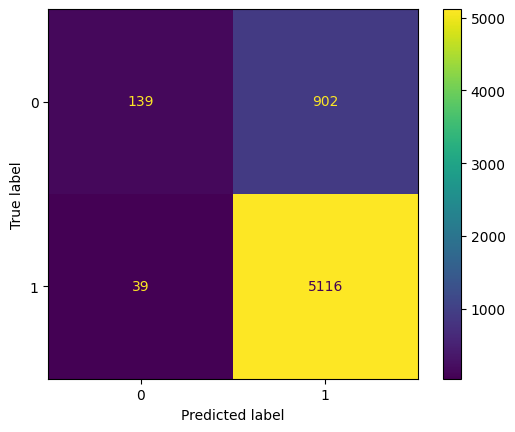

In [ ]:
matrix = confusion_matrix(y_test, y_pred1)
print(matrix)
ConfusionMatrixDisplay(matrix).plot()
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train,y_train)
y_pred2 = model.predict(x_test)
print("Accuracy of the Test Data \n {}".format(metrics.accuracy_score(y_test,y_pred2)))
print(classification_report(y_test, y_pred2))

Accuracy of the Test Data 
 0.8918657198192382
              precision    recall  f1-score   support

           0       0.91      0.40      0.55      1041
           1       0.89      0.99      0.94      5155

    accuracy                           0.89      6196
   macro avg       0.90      0.69      0.75      6196
weighted avg       0.89      0.89      0.87      6196



[[ 413  628]
 [  42 5113]]


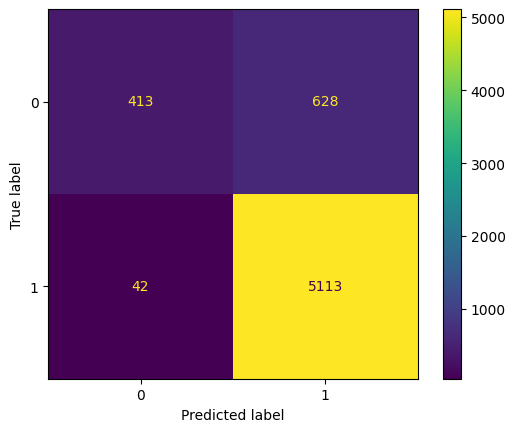

In [ ]:
matrix = confusion_matrix(y_test, y_pred2)
print(matrix)
ConfusionMatrixDisplay(matrix).plot()
plt.show()

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
y_pred_log = logistic_model.predict(x_test)
y_pred_log_proba = logistic_model.predict_proba(x_test)

In [ ]:
test_data = "I enjoy being trans"
df = tfidf.transform([test_data]).toarray()
print(logistic_model.predict(df))

[1]


In [ ]:
print(classification_report(y_test, y_pred_log))
print("Accuracy of the Test Data \n {}".format(metrics.accuracy_score(y_test,y_pred_log)))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1041
           1       0.95      0.98      0.96      5155

    accuracy                           0.94      6196
   macro avg       0.91      0.86      0.88      6196
weighted avg       0.94      0.94      0.94      6196

Accuracy of the Test Data 
 0.9377017430600387


[[ 771  270]
 [ 116 5039]]


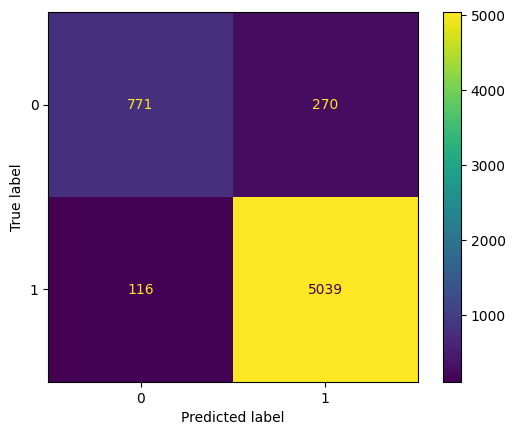

In [ ]:
matrix = confusion_matrix(y_test, y_pred_log)
print(matrix)
ConfusionMatrixDisplay(matrix).plot()
plt.show()

In [ ]:
svm_model  =  LinearSVC()
svm_model.fit(x_train, y_train)
y_pred3 = svm_model.predict(x_test)
svm_score = svm_model.score(x_test, y_test)
print("Accuracy of the Test Data \n {}".format(metrics.accuracy_score(y_test,y_pred3)))
print(classification_report(y_test, y_pred_log))

Accuracy of the Test Data 
 0.9389928986442866
              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1041
           1       0.95      0.98      0.96      5155

    accuracy                           0.94      6196
   macro avg       0.91      0.86      0.88      6196
weighted avg       0.94      0.94      0.94      6196



[[ 842  199]
 [ 179 4976]]


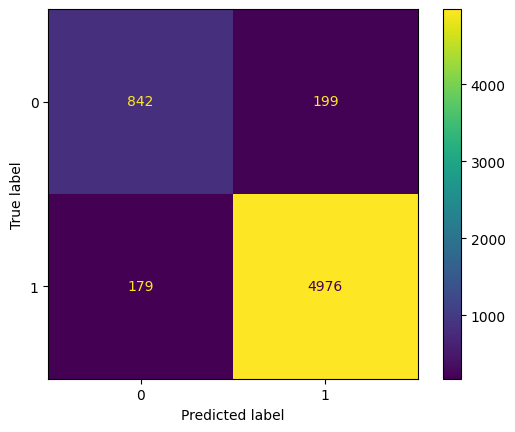

In [ ]:
matrix = confusion_matrix(y_test, y_pred3)
print(matrix)
ConfusionMatrixDisplay(matrix).plot()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred4 = rf.predict(x_test)
accuracy_score(y_test,y_pred4)

0.9441575209812783

[[ 851  190]
 [ 156 4999]]


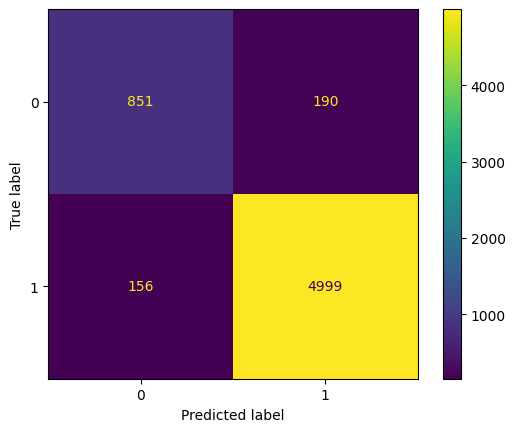

In [ ]:
matrix = confusion_matrix(y_test, y_pred4)
print(matrix)
ConfusionMatrixDisplay(matrix).plot()
plt.show()

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred5 = xgb.predict(x_test)
accuracy_score(y_test,y_pred5)

0.9425435765009683

[[ 935  106]
 [ 250 4905]]


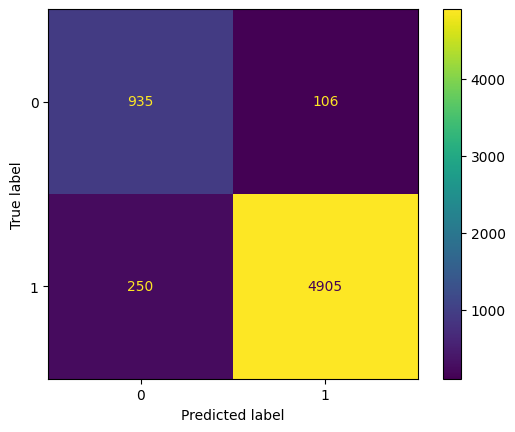

In [ ]:
matrix = confusion_matrix(y_test, y_pred5)
print(matrix)
ConfusionMatrixDisplay(matrix).plot()
plt.show()

In [ ]:
test_data = "i love everything"
df = tfidf.transform([test_data]).toarray()
print(xgb.predict(df))

[0]


In [ ]:
filename = 'trained_hate.sav'
import pickle
pickle.dump(logistic_model,open(filename,'wb'))

In [ ]:
pickle.dump(vectorize,open('vectorize.pickle','wb'))
pickle.dump(clean,open('clean.pickle','wb'))